In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import math

from sklearn.linear_model import LogisticRegression

In [53]:
dec_2016 = pd.read_csv('data/raw_data/Video_Games_Sales_as_at_22_Dec_2016.csv')
jan_2017 = pd.read_csv('data/raw_data/Video_Game_Sales_as_of_Jan_2017.csv')

In [54]:
''' Read all the csv's into a list. '''
year_csv = {}
for csv in glob.iglob('data/time_series_data/*.csv'):
    thing = csv.split("/")
    year = thing[2].split(".")[0]
    year_csv[year] = csv

In [55]:
def total_sales_for_year(year, sales_region):
    total_sales = 0
    for k in range(len(dec_2016)):
        this_year = dec_2016.iloc[k]['Year_of_Release']
        if not math.isnan(this_year) and str(int(this_year)) == year:
            total_sales += float(dec_2016.iloc[k][sales_region])
            
    for k in range(len(jan_2017)):
        this_year = jan_2017.iloc[k]['Year_of_Release']
        if not math.isnan(this_year) and str(int(this_year)) == year:
            total_sales += float(jan_2017.iloc[k][sales_region])
    return total_sales

In [56]:
''' Returns a mapping of each year to the number of sales of games of the given feature in the given region.
    Calculates number of sales normalized for that year if normalize is True - default False. '''
def calc_sales_for_feature(year_csv, feature, feature_value, sales_region, normalize):
    sales = {}
    
    for k in range(len(dec_2016)):
        feat = dec_2016.iloc[k][feature]
        year = dec_2016.iloc[k]['Year_of_Release']
        if math.isnan(year):
            continue
        
        if year not in sales.keys():
            sales[int(year)] = 0.
        if feat == feature_value:
            sales[year] += dec_2016.iloc[k][sales_region]

    for k in range(len(jan_2017)):
        feat = jan_2017.iloc[k][feature]
        year = jan_2017.iloc[k]['Year_of_Release']
        if math.isnan(year):
            continue 
        
        if year not in sales.keys():
            sales[int(year)] = 0.
        if feat == feature_value:
            sales[year] += jan_2017.iloc[k][sales_region]
    
    # Normalize sales by the total sales for all games in the given year.
    if normalize:
        for year in sales.keys():
            sales[year] /= total_sales_for_year(str(year), sales_region)
    
    return sales

In [61]:
def generate_success_data(X_label, Y_label):
    # Get list of unique genres from datasets.
    x_values = []
#    for genre in dec_2016['Genre']:
    for x in dec_2016[X_label]:
        if x not in x_values:
            x_values.append(x)        
    for x in jan_2017[X_label]:
        if x not in x_values:
            x_values.append(x)

    # Aggregate yearly global sales for each genre, normalized and unnormalized.
    for x in x_values:
#        sales = calc_sales_for_feature(year_csv, 'Genre', genre, 'Global_Sales', False)
        sales = calc_sales_for_feature(year_csv, X_label, x, Y_label, False)
        sales_norm = calc_sales_for_feature(year_csv, X_label, x, Y_label, True)

        # Save the aggregated sales to csv's (because this takes forever to run)
        pd.DataFrame.from_dict(sales, orient='index').to_csv('data/time_series_data/aggregated_sales/' + x + '.csv')
        pd.DataFrame.from_dict(sales_norm, orient='index').to_csv('data/time_series_data/aggregated_sales/' + x + '_norm.csv')

#        # Plot the aggregated sales against years.
#        plt.scatter(sales.keys(), sales.values())
#        plt.title(x)
#        plt.show()
#        plt.scatter(sales_norm.keys(), sales_norm.values())
#        plt.title(x + ' - normalized')
#        plt.show()

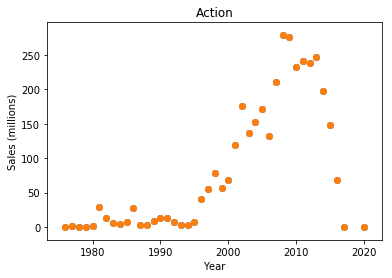

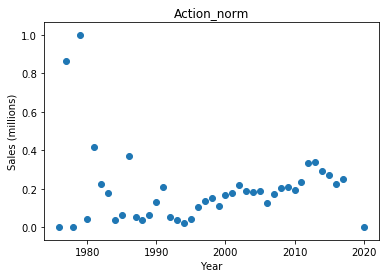

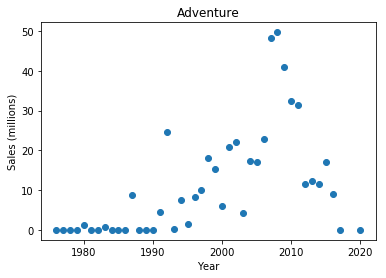

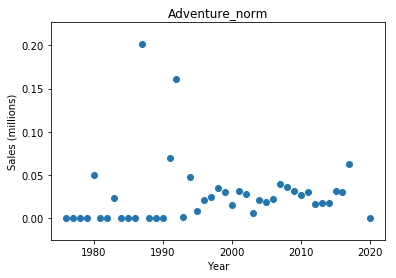

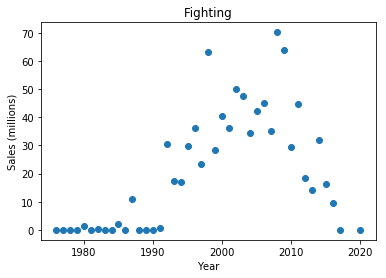

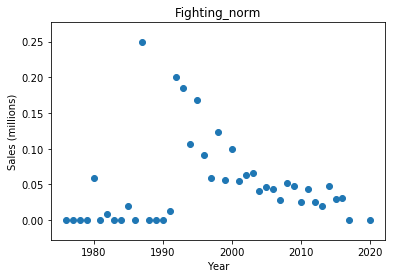

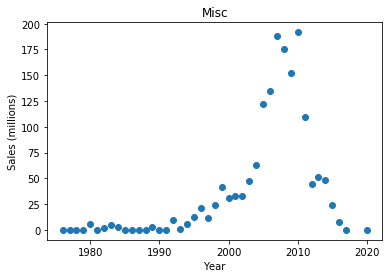

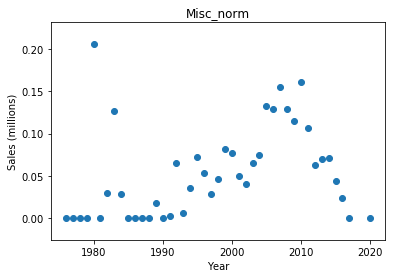

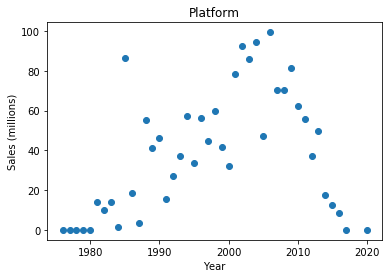

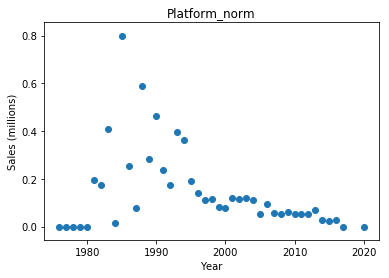

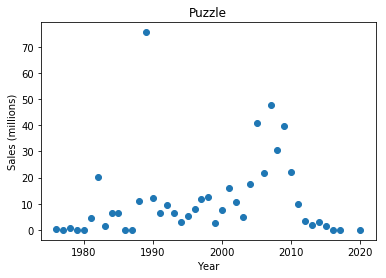

In [ ]:
for csv in glob.iglob('data/time_series_data/aggregated_sales/*.csv'):
    x = csv.split("/")[3].split(".")[0]
    csv = pd.read_csv(csv)
 
    # Plot the aggregated sales against years.
    plt.scatter(csv['Unnamed: 0'], csv['0'])
    plt.title(x)
    plt.xlabel('Year')
    plt.ylabel('Sales (millions)')
    plt.show()